Pin-hole Camera Geometry
https://www.3dflow.net/elementsCV/S3.xhtml

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
H = 400
W = 400
f = 1200

In [3]:
rays_o = np.zeros((H*W, 3))
rays_d = np.zeros((H*W, 3))

u = np.arange(W)    # dimension 400 = [0, 1,..., 399]
v = np.arange(H)    # dimension 400 = [0, 1,..., 399]
u, v = np.meshgrid(u, v)    # dimension 400 x 400
                            # u = [[0, 1... 399], [0, 1... 399], ..., [0, 1... 399]]
                            # v = [[0, 0, ..., 0], [1, 1, ..., 1], [399, 399, ..., 399]]

dirs = np.stack((u - W / 2,
                 -(v - H / 2),
                 - np.ones_like(u) * f), axis=-1)   # dimension 400 x 400 x 3
                                                    # dirs = [[[-200 -> -200], ..., [199 -> 199]]
                                                    #         [[200 -> -199], ..., [200 -> -199]]
                                                    #         [[-1200 -> -1200], ..., [-1200 -> -1200]]]

rays_d = dirs / np.linalg.norm(dirs, axis=-1, keepdims=True)    # dimension 400 x 400 x 3
                                                                # Divide by Euclidian distance from optical center to pixel on image plane
                                                                # sqr(X^2 + Y^2 + Z^2)

rays_d = rays_d.reshape(-1, 3)  # dimension 160000 x 3
                                # Reshape so that last dimension is 3, and the first dimension automatically fits the data

In [4]:
def plot_rays(o, d, t):
    
    fig = plt.figure(figsize=(12, 12))
    ax = plt.axes(projection='3d')
    
    pt1 = o
    pt2 = o + t * d
    
    for p1, p2 in zip(pt1[::100], pt2[::100]):  # zip allows iterating through pt1 and pt2 together
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]])    # Draw line between points p1 and p2
    
    
    plt.show()

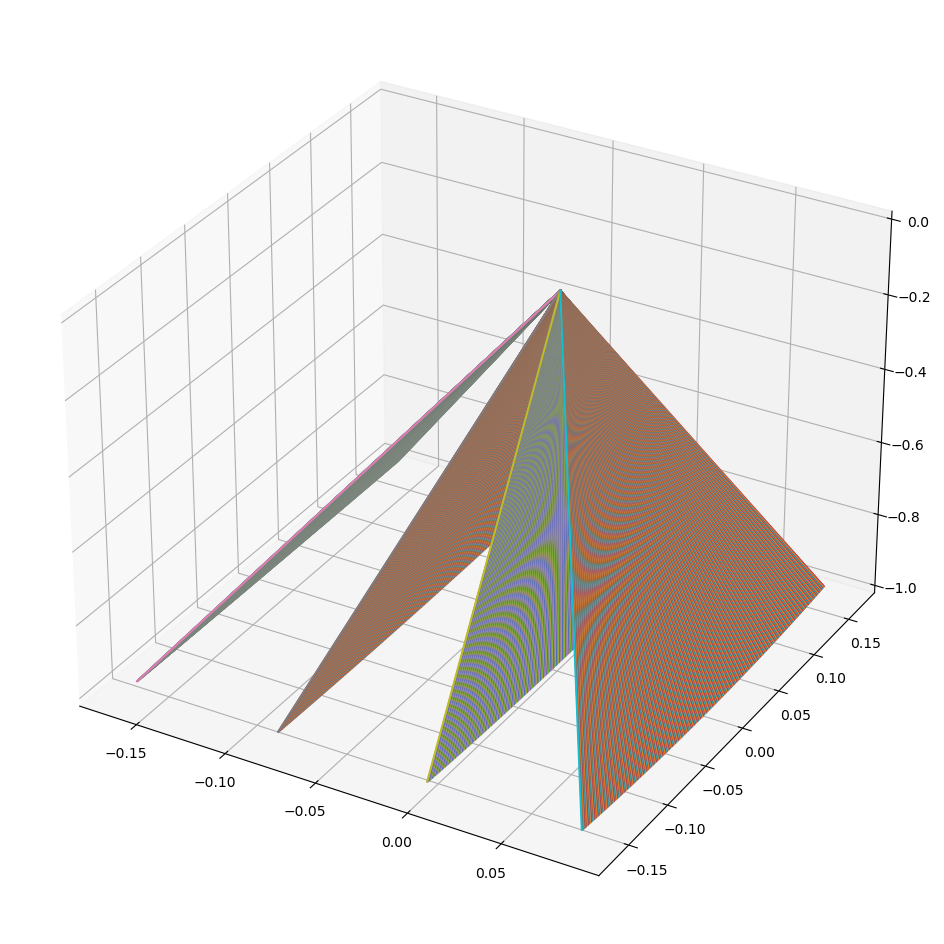

In [5]:
plot_rays(rays_o, rays_d, 1)

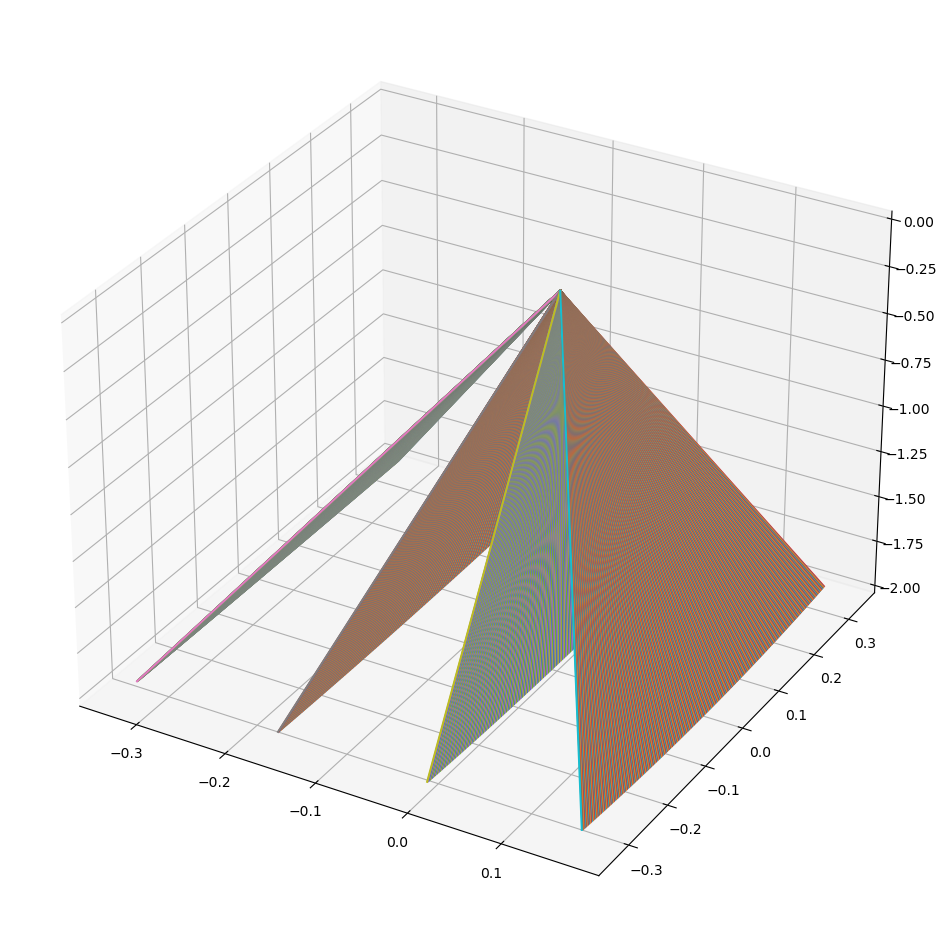

In [81]:
plot_rays(rays_o, rays_d, 2)